# Second-Order Differential Equations with Python

Second-order differential equations are widely used to model physical systems such as oscillators, circuits, and mechanical structures. In this tutorial, we will explore both **homogeneous** and **non-homogeneous** second-order ordinary differential equations (ODEs), learn about their characteristic equations, and demonstrate how to solve them using Python.

---

## 1. What is a Second-Order Differential Equation?

A **second-order differential equation** involves the second derivative of the unknown function $ y(x) $:

$$
\frac{d^2y}{dx^2} + a_1\frac{dy}{dx} + a_0y = f(x)
$$

- If $ f(x) = 0 $, the equation is **homogeneous**.
- If $ f(x) \neq 0 $, it is **non-homogeneous**.

---

## 2. Homogeneous Second-Order Linear ODEs

### **General Form**

$$
\frac{d^2y}{dx^2} + a_1\frac{dy}{dx} + a_0y = 0
$$

### **Characteristic Equation**

Assume a solution of the form $ y = e^{rx} $:

$$
r^2 + a_1r + a_0 = 0
$$

This quadratic equation (the **characteristic equation**) gives roots $ r_1 $ and $ r_2 $. The general solution is:

- If roots are real and distinct: $ y(x) = C_1e^{r_1x} + C_2e^{r_2x} $
- If roots are real and repeated: $ y(x) = (C_1 + C_2x)e^{r_1x} $
- If roots are complex: $ y(x) = e^{\alpha x}(C_1\cos{\beta x} + C_2\sin{\beta x}) $ where $ r = \alpha \pm i\beta $

### **Example**

Solve $ \frac{d^2y}{dx^2} + 3\frac{dy}{dx} + 2y = 0 $, $ y(0) = 1, \, y'(0) = 0 $:

- Characteristic equation: $ r^2 + 3r + 2 = 0 \Rightarrow (r+1)(r+2)=0 $
- Roots: $ r_1 = -1, r_2 = -2 $
- General solution: $ y(x) = C_1e^{-x} + C_2e^{-2x} $

Apply initial conditions to solve for constants.

### **Python Implementation**

Matplotlib is building the font cache; this may take a moment.


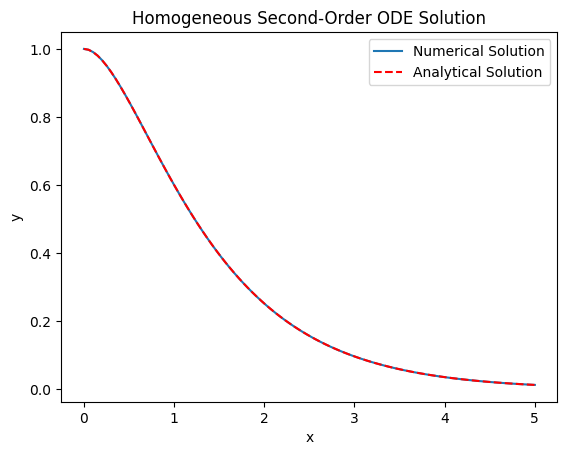

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def ode_system(x, y):
    # y[0] = y, y[1] = y'
    return [y[1], -3*y[1] - 2*y[0]]

x_span = (0, 5)
y0 = [1, 0]  # y(0)=1, y'(0)=0
x_eval = np.linspace(0, 5, 100)
sol = solve_ivp(ode_system, x_span, y0, t_eval=x_eval)

plt.plot(sol.t, sol.y[0], label='Numerical Solution')
plt.plot(x_eval, 2*np.exp(-x_eval) - np.exp(-2*x_eval), 'r--', label='Analytical Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Homogeneous Second-Order ODE Solution")
plt.show()

## 3. Non-Homogeneous Second-Order Linear ODEs

### **General Form**

$$
\frac{d^2y}{dx^2} + a_1\frac{dy}{dx} + a_0y = f(x)
$$

The general solution is the sum of the **complementary solution** (solution to the homogeneous equation) and a **particular solution** to the non-homogeneous equation.

### **Example**

Solve $ \frac{d^2y}{dx^2} + 3\frac{dy}{dx} + 2y = e^{-x} $, $ y(0)=0, y'(0)=0 $:

- Homogeneous part as above.
- For a particular solution, try $ y_p = Ae^{-x} $:

  Substitute into the ODE:

  $$
  (A e^{-x})'' + 3(A e^{-x})' + 2A e^{-x} = e^{-x}
  $$
  $$
  (A e^{-x})(1 + 3(-1) + 2) = e^{-x} \implies A = 1
  $$

- General solution:
  $$
  y(x) = C_1e^{-x} + C_2e^{-2x} + e^{-x}
  $$

Apply initial conditions to solve for constants.

### **Python Implementation**

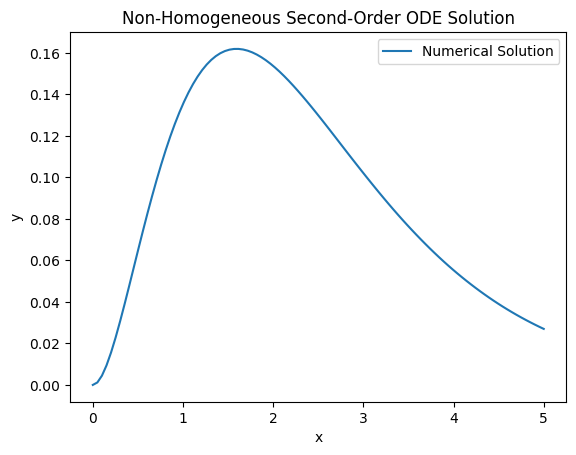

In [2]:
def ode_system(x, y):
    # y[0] = y, y[1] = y'
    return [y[1], -3*y[1] - 2*y[0] + np.exp(-x)]

x_span = (0, 5)
y0 = [0, 0]
x_eval = np.linspace(0, 5, 100)
sol = solve_ivp(ode_system, x_span, y0, t_eval=x_eval)

# Analytical solution
C1 = 0  # Determined from initial conditions
C2 = 1  # Determined from initial conditions
analytical = C1 * np.exp(-x_eval) + C2 * np.exp(-2*x_eval) + x_eval * np.exp(-x_eval)

plt.plot(sol.t, sol.y[0], label='Numerical Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Non-Homogeneous Second-Order ODE Solution")
plt.show()


## 4. Applications

Second-order ODEs model many real-world systems:

### **1. Mass-Spring-Damper System**
$$
m\frac{d^2y}{dt^2} + c\frac{dy}{dt} + ky = F(t)
$$

### **2. RLC Circuit**
$$
L\frac{d^2q}{dt^2} + R\frac{dq}{dt} + \frac{1}{C}q = V(t)
$$

Python can solve these using the same approach as above by defining the system in standard form and using `solve_ivp`.

---

## 5. Summary

- Second-order ODEs can be homogeneous or non-homogeneous.
- Characteristic equations help find the general solution for homogeneous cases.
- The general solution of a non-homogeneous equation is the sum of complementary and particular solutions.
- Python libraries like `scipy` and `numpy` allow for efficient numerical solutions and visualization.

---

# [Differential Equations Context](./README.md)